<a href="https://colab.research.google.com/github/dmuman/ML-labs/blob/main/lab5/lab5_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Імпорт необхідних бібліотек

* `numpy` для математичних операцій
* `pandas` для роботи з даними

In [634]:
import numpy as np
import pandas as pd

# Завдання 1

Необхідно:
* переглянути датасет
* продемонструвати, як регіони світу розподіляються за середніми значеннями індикаторів Total score, Research, Development та Commercial.

## Перагляд датасету

Спершу, по старій традиції, імпортуємо сет через посилання на "сирий" файл з гітхабу й створимо з нього датафрейм:

In [635]:
# посилання на "сирий" файл
url = 'https://raw.githubusercontent.com/OlhaOsypova/Machine-Learning-and-Data-Analytics/refs/heads/main/Topic_6_Clustering/Task/AI_index.csv'

# створення фрейму
df = pd.read_csv(url)

# виведення перших 5 рядків
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,High,Liberal democracy


Далі переглянемо детальну інформація про датасет:

In [636]:
# перегляд детальної інформації
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                61 non-null     object 
 1   Talent                 61 non-null     float64
 2   Infrastructure         61 non-null     float64
 3   Operating Environment  61 non-null     float64
 4   Research               61 non-null     float64
 5   Development            61 non-null     float64
 6   Government Strategy    61 non-null     float64
 7   Commercial             61 non-null     float64
 8   Total score            61 non-null     float64
 9   Region                 61 non-null     object 
 10  Income group           61 non-null     object 
 11  Political regime       61 non-null     object 
dtypes: float64(8), object(4)
memory usage: 5.8+ KB


Сет має тільки $61$ входження (рядків) та $12$ колонок, з яких $8$ є числовими, а $4$ - текстовими (категоріальними).

Пропусків немає в жодній з колонок.

## Розподіл регіонів

Для виконання цього завдання спершу виділимо наші колонки (загальна оцінка, дослідження, розвиток та комерція):

In [637]:
# створення списку колонок
indicators = ['Total score', 'Research', 'Development', 'Commercial']

Тепер ці колонки можна згрупувати за регіоном та знайти середнє значення для кожної колонки:

In [638]:
# групування колонок по регіону
grouped_by_region = df.groupby('Region')[indicators]

# визначення середнього значення для кожної колонки для кожного регіону
grouped_mean = grouped_by_region.mean()

# виведення середніх значень
grouped_mean

,Total score,Research,Development,Commercial
Region,,,,
Africa,6.426000,1.342000,4.356000,0.584000
Americas,29.031250,18.385000,17.540000,15.155000
Asia-Pacific,25.792143,20.723571,23.397857,7.032143
Europe,25.618214,17.991071,12.520357,4.387143
Middle East,19.656667,11.323333,9.901667,5.971667


Тепер, коли ми маємо середні значення кожного з індикаторів для кожного регіону, ці дані можна відобразити у вигляді графіка (в нашому випадку - стовпчикової діаграми):

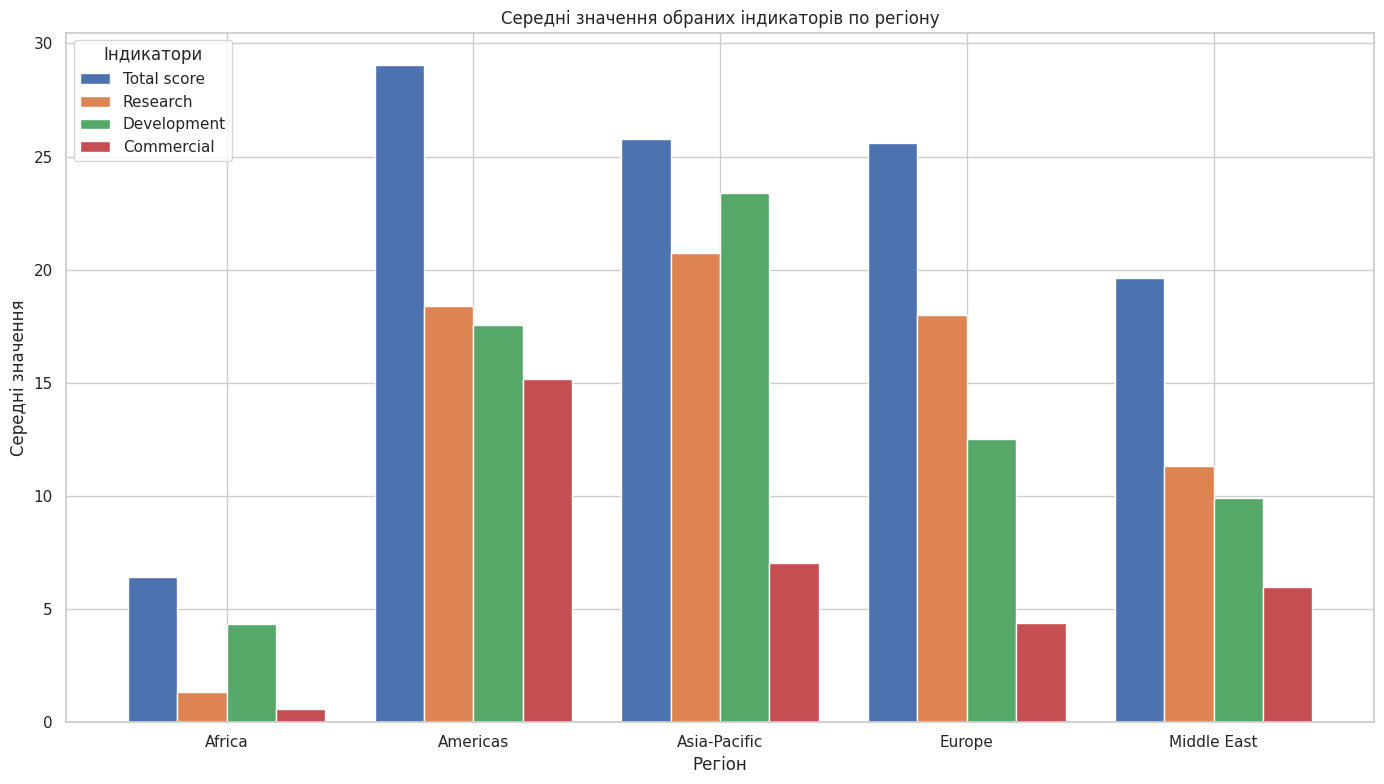

In [639]:
# імпорт бібліотек для побудови графіків
import matplotlib.pyplot as plt
import seaborn as sns

# задання гріду
sns.set_theme(style='whitegrid')

# побудова стопвчикової діграми
grouped_mean.plot(kind='bar', width=0.8, figsize=(14, 8))

# задання тайтлів та лейблів
plt.title('Середні значення обраних індикаторів по регіону')
plt.xlabel('Регіон')
plt.ylabel('Середні значення')
plt.xticks(rotation=0) # повернемо назви регіонів, щоб їх було зручно читати

# легенда
plt.legend(title='Індикатори', loc='upper left')

# відображення графіка
plt.tight_layout() # відступи між стовпцями
plt.show()

Можна побачити, що найнижчі середні показники у Африці. Далі йте Середній Схід, Європа, Азійсько-Тихоокеанський регіон й Америка (північна й південна).

# Завдання 2

Необідно підготувати дані для проведення кластерного аналізу.

Для цього треба:
* перекодувати текстові дані
* стандартизувати числові

## Перекодування текстових даних

Як колонки для перекодування я обрав `'Income group'` та `'Political regime'`, адже дохід можна розподілити по зростанню, а автократичні режими можна позначити гіршими за демократичні.

Спершу переглянемо які унікальні значення мають необхідні нам колонки:

In [640]:
# список колонок
columns = ['Region', 'Income group', 'Political regime']

for column in columns:
  # виведення унікальних значень
  print(df[column].unique())

['Americas' 'Asia-Pacific' 'Europe' 'Middle East' 'Africa']
['High' 'Upper middle' 'Lower middle']
['Liberal democracy' 'Closed autocracy' 'Electoral democracy'
 'Electoral autocracy']


Можна помітити, що унікальних значень в кожній колонці не так вже й багато. Тепер їх усі можна упорядкувати за допомогою `OrdinalEncoder`:

In [641]:
# імпорт OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

# створення власного порядку
# електоральна демократія краща за ліберальну
# (плюс у противному випадку США отримує просто неймовірні оцінки)
custom_order = [
    ['Africa', 'Middle East', 'Europe', 'Asia-Pacific', 'Americas'],
    ['Lower middle', 'Upper middle', 'High'],
    ['Closed autocracy', 'Electoral autocracy', 'Liberal democracy', 'Electoral democracy']
]

# ініціалізація енкодера
encoder = OrdinalEncoder(categories=custom_order)

# перекодування колонок
df[columns] = encoder.fit_transform(df[columns])

# виведення результатів
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,4.0,2.0,2.0
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,3.0,1.0,0.0
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,2.0,2.0,2.0
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,4.0,2.0,2.0
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,1.0,2.0,2.0


Можна помітити, що дані було перекодовано у зростаючому (й заданому мною) порядку.

## Стандартизація числових даних

Тепер, коли потрібні колонки перекодовано, всі числові дані можна стандартизувати за допомогою старого-доброго `StandardScaler`.

Для цього я розділю фрейм на дві частини:
* з текстовими даними
* та числовими

In [642]:
# категоріальні колонки
country_column = df[['Country']]

# числові колонки -- ті, які треба стандартизувати
to_standardize = df.drop(df[['Country']], axis=1)

Тепер можна перейти до стандартизації:

In [643]:
# імпорт необхідної бібліотеки
from sklearn.preprocessing import StandardScaler

# ініціалізація скейлера
scaler = StandardScaler()

# стандартизування числових колонок
scaler.fit(to_standardize)
X_stand = scaler.fit_transform(to_standardize)

Після того, як дані було перекодовано та стандартизовано, можна проводими кластеризацію.

# Завдання 3

Необхідно виконати кластеризацію країн за методом $k$-середніх. Кількість кластерів треба оберати за методом "зігнутого ліктя".

Для цього можна скористатись бібліотекою `KMeans`.

## Обрання кількості кластерів

Для цього використаємо метод "зігнутого ліктя":

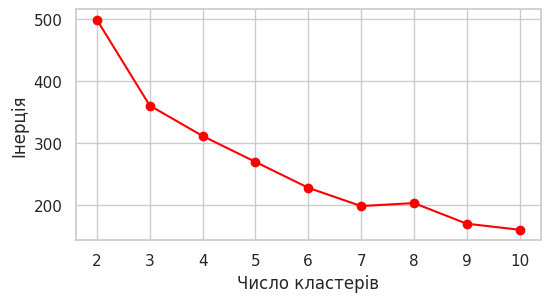

In [644]:
# імпорт необхідної бібліотеки
from sklearn.cluster import KMeans

# кількість кластерів (від 2 до 10 включно)
clusters = range(2, 11)

# список інерцій
inertias = []

for k in clusters:
  # задання методу кластеризації (k-means)
  model = KMeans(n_clusters=k, random_state=42)

  # оцінка моделі
  model.fit(X_stand)

  # розрахунок інерції для кожної кількості кластерів та додавання її у список
  inertias.append(model.inertia_)

# побудова графіка інтерцій
plt.figure(figsize=(6,3))
plt.plot(clusters, inertias, '-o', color='red')
plt.xlabel('Число кластерів')
plt.ylabel('Інерція')
plt.xticks(clusters)
plt.show()

В даному випадку оптимальною кількість кластерів є $4$. Можна було б обрати $5$, але воно тоді виділяє і Китай, і США в окремі кластери, тоиу краще вже тільки США матиме свій власний кластер.

## Кластеризація

Тепер можна провести кластеризацію, розбивши датасет на $4$ кластери:

In [645]:
# розбивка даних на 4 кластери
kmeans = KMeans(n_clusters=4, random_state=42)

# оцінка моделі
kmeans.fit(X_stand)

# отримання відповідних кластерів
labels = kmeans.predict(X_stand)
labels

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3,
       3, 0, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1], dtype=int32)

Бачимо, що було створено $4$ кластери (від $0$ до $3$ включно).

Тепер отримані значення кластерів можна додати до таблиці із початковими значеннями:

In [646]:
# додавання нової колонки
df['Cluster'] = labels

# виведення результатів
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Income group,Political regime,Cluster
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,4.0,2.0,2.0,2
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,3.0,1.0,0.0,0
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,2.0,2.0,2.0,0
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,4.0,2.0,2.0,0
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,1.0,2.0,2.0,0


Можна помітити, що колонку було додано. Тепер можна порахувати наповненість кластерів:

In [647]:
df[['Cluster']].value_counts()

,count
Cluster,
0,40
3,11
1,9
2,1


З дивного (хоч і не дуже) -- США виділило в окремий кластер. Воно й не дивно, коли люди, які робили ці оцінки, брали за основу показники США. Від того й усі значення там по $100$. Це дуже.. як би це сказати, несправедливо по відношенню до інших країн й дуже ламає якість кластеризації.

# Завдання 4

Необхідно надати детальну характеристику отриманим кластерам, а також дізнатись, які країни формують кожен кластер.

Спершу знайдемо центроїди.

## Центри кластерів

Тепер можна знайти найбільш типового представника кожного кластера -- його центр. Для цього можна використати атрибут `cluster_centers_`:

In [648]:
# отримання центрів кластерів
centers = kmeans.cluster_centers_

In [649]:
# список колонок для зручного доступу
df.columns

Index(['Country', 'Talent', 'Infrastructure', 'Operating Environment',
       'Research', 'Development', 'Government Strategy', 'Commercial',
       'Total score', 'Region', 'Income group', 'Political regime', 'Cluster'],
      dtype='object')

Тепер створимо новий фрейм, який міститиме отримані центри. Для коректної роботи включати текстові колонки не потрібно:

In [650]:
# список колонок
columns = ['Talent', 'Infrastructure', 'Operating Environment',
       'Research', 'Development', 'Government Strategy', 'Commercial',
       'Total score', 'Income group', 'Region', 'Political regime']

# створення нового фрейму з центрами
new_df = pd.DataFrame(centers, columns = [columns])

# виведення результатів
new_df.head()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Income group,Region,Political regime
0,0.213306,0.470160,0.320407,0.288932,0.210930,0.323371,0.030145,0.318768,-0.051330,0.505903,0.017267
1,-0.808806,-1.587529,-1.181338,-0.868367,-0.618211,-1.533472,-0.405445,-1.162992,-1.367093,-1.444580,-0.567895
2,5.467133,1.508683,-0.130348,4.787175,4.392155,0.773999,6.688754,5.029497,1.667270,0.604708,0.017267
3,-0.610920,-0.547939,-0.186716,-0.775376,-0.660494,0.008401,-0.385958,-0.664846,1.153616,-0.712691,0.400282


Тепер ми маємо центри для кожного з індикаторів у кожному кластері.

Проте так як ця колонка містить значення у стандартизованому вигляді, краще буде перейти до розрахунку середніх за кластерами значень у натуральних одиницях:

In [651]:
# середні за кластерми значення
# виділяємо тільки числові колонки
mean_values = df.groupby('Cluster')[df.select_dtypes('float').columns].mean()

# виведення результатів
mean_values

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Income group,Political regime
Cluster,,,,,,,,,,,
0,20.117500,73.024000,73.538000,21.680000,18.842500,65.712250,6.673000,28.766500,2.175000,1.925000,2.000000
1,4.576667,31.423333,43.626667,1.530000,2.748889,17.593333,0.567778,6.360000,0.777778,0.444444,1.444444
2,100.000000,94.020000,64.560000,100.000000,100.000000,77.390000,100.000000,100.000000,4.000000,2.000000,2.000000
3,7.585455,52.440909,63.437273,3.149091,1.928182,57.550000,0.840909,13.892727,3.454545,1.000000,2.363636


Оцінювати кластери я буду за чотирма попередніми індикаторами: Загальна оцінка, Дослідження, Розвиток та Комерція.

А також й за регіоном.

**Кластер $0$**:
* Загальна оцінка: в середньому це $28.76$ балів - більш-менш, проте в нашому випадку це достатній результат.
* Дослідження: в середньому $21.68$ бал - так сама ситуація.
* Розвиток: $18.84$ в середньому - так само.
* Комерція: $6.67$ балів.
* Регіон: $2.17$ - це бличже до Європи.

**Висновок**: кластер складається з держав із середньо-достатнім рівнем розвитку.


**Кластер $1$**:
* Загальна оцінка: $6.36$ - доволі низький показник.
* Дослідження: $1.53$ - також доволі низький.
* Розвиток: $2.74$ - низький рівень розвитку.
* Комерція: $0.56$ - дуже низький рівень.
* Регіон: $0.77$ - щось між Африкою та Середнім Сходом.


**Висновок**: кластер складається із держав з низьким рівнем розвитку.


**Кластер $2$**:
* Загальна оцінка: $100$.
* Дослідження: $100$.
* Розвиток: $100$.
* Комерція: $100$.
* Регіон: $4$ - Америка (не тяжко здогадатись, яка частина).

**Висновок**: я навіть коментувати не буду. Як я вже казав, несправедливо було ставити США все по $100$ балів і оцінювати держави базуючись на них.


**Кластер $3$**:
* Загальна оцінка: $13.89$ - враховуючи іншу статистику - доволі середній результат.
* Дослідження: $3.14$ - також середній результат.
* Розвиток: $1.92$  - середньо-низький результат.
* Комерція: $0.84$ - відносно низький рівень.
* Регіон: $3.45$ - щось між Азією та Америками.

**Висновок**: кластер складається із держав з середнім рівнем розвитку.

Заради інтересу - словником можна зручно показати інформацію про країни, які складають кожен кластер. В такому словнику кластер буде ключем, а список країн - значенням.

Для цього треба виділити дві колонки - `'Country'` та `'Cluster'`:

In [652]:
# виділені колонки
clustered_countries = df[['Country', 'Cluster']]

Тепер країни можна згрупувати за кластером та перевести це в словник:

In [653]:
# групування та створення словника
cluster_dict = clustered_countries.groupby('Cluster')['Country'].apply(list).to_dict()

# виведення результату
cluster_dict

{0: ['China',
  'United Kingdom',
  'Canada',
  'Israel',
  'Singapore',
  'South Korea',
  'The Netherlands',
  'Germany',
  'France',
  'Australia',
  'Ireland',
  'Finland',
  'Denmark',
  'Luxembourg',
  'Japan',
  'India',
  'Switzerland',
  'Sweden',
  'Hong Kong',
  'Spain',
  'Austria',
  'Estonia',
  'Taiwan',
  'Norway',
  'Saudi Arabia',
  'Belgium',
  'Poland',
  'Slovenia',
  'New Zealand',
  'Italy',
  'Malta',
  'United Arab Emirates',
  'Portugal',
  'Czech Republic',
  'Iceland',
  'Lithuania',
  'Greece',
  'Slovakia',
  'Hungary',
  'Qatar'],
 1: ['Bahrain',
  'Tunisia',
  'South Africa',
  'Morocco',
  'Armenia',
  'Egypt',
  'Kenya',
  'Nigeria',
  'Pakistan'],
 2: ['United States of America'],
 3: ['Brazil',
  'Malaysia',
  'Mexico',
  'Chile',
  'Argentina',
  'Turkey',
  'Colombia',
  'Uruguay',
  'Vietnam',
  'Indonesia',
  'Sri Lanka']}

**Кластер $0$**: переважно країни Європи (плюс розвинені країни Азії).

**Кластер $1$**: країни Африки.

**Кластер $2$**: США.

**Кластер $3$**: країни америк та Азії.

## Порівняння із дослідженням (діаграма розсіювання)

Додатково можна візуалізувати кластери.

Я візуалізую розподіл досліджень та загальної оцінки за кластерами:

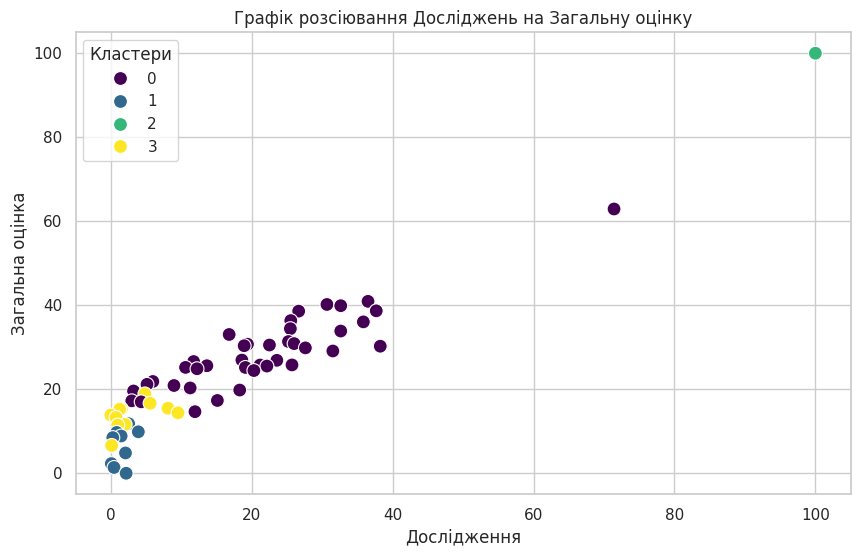

In [654]:
# розміри фігури
plt.figure(figsize=(10, 6))

# створення графіка розсіювання
sns.scatterplot(
    data=df,
    x='Research',
    y='Total score',
    hue='Cluster',
    palette='viridis',
    s=100,
)

# додавання підписів
plt.title('Графік розсіювання Досліджень на Загальну оцінку')
plt.xlabel('Дослідження')
plt.ylabel('Загальна оцінка')

# легенда
plt.legend(title='Кластери')

# відображення графіка
plt.show()

Можна помітити, що США та Китай дуже сильно випереджають всі інші країни. Тим не менше, їх не об'єднало в один кластер, як було у дослідженні із завдання. В даному випадку, Китай віднесло до країн із достатнім рівнем розивитку.

Цікаво, що якщо кластерів робити $5$ - Китай все одно не об'єднується із США - для нього також створюється окремий кластер. Але в цьому вже просто немає сенсу.

## Порівняння із дослідженням (кругова діаграма)

Чисто для візуального порівняння із дослідженням з завдання можна відобразити результати у круговій діаграмі.

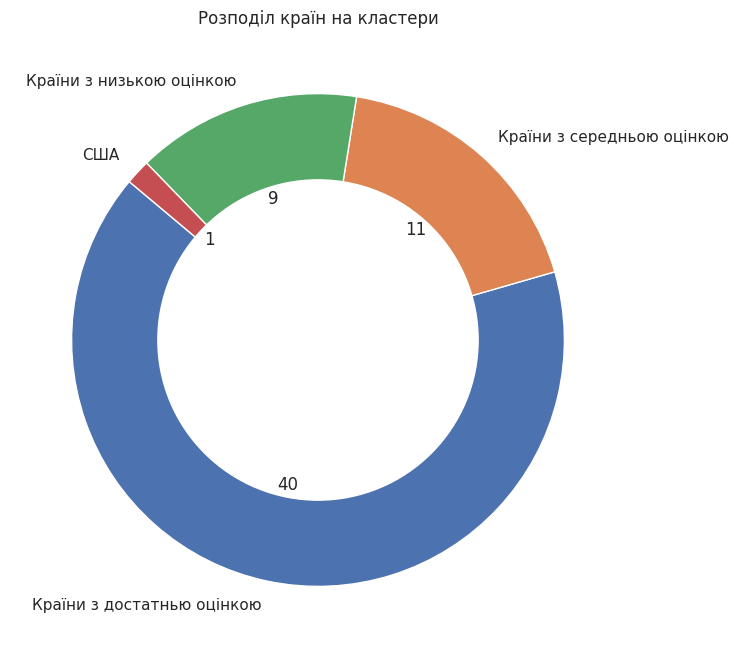

In [660]:
# кількість елементів в кластерах
cluster_counts = df['Cluster'].value_counts()

# розмір фігури
plt.figure(figsize=(8, 8))

# побудова кругової діаграми
plt.pie(
    cluster_counts,
    autopct=lambda p: f'{int(np.round(p * sum(cluster_counts) / 100, 0))}', # аби відображалась кількість елементів
    labels=['Країни з достатнью оцінкою', 'Країни з середньою оцінкою', 'Країни з низькою оцінкою', 'США'],  # Імена кластерів як підписи
    startangle=140 # оберт діаграми для гарного відображення
)

# кружечок в центрі, щоб було схоже на діаграму з завдання
hole = plt.Circle((0, 0), 0.65, facecolor='white')

# додавання кружечку до графіка
plt.gcf().gca().add_artist(hole)

# назва графіка
plt.title('Розподіл країн на кластери')

# відображення діаграми
plt.show()

Можна помітити, що дана діаграма дуже схожа на діаграму із завдання. Тільки тут не поділені на два кластери 9 країн з низькою оцінкою, окремо Китай не в одній групі з США тощо. Але загалом - результати дуже схожі.

# Висновок

У результаті виконання даної лабораторної роботи мною було досліджено датасет, проведено його відготовку до кластеризації, а потім і саму кластеризацію. Країни було поділено відповідно до їхніх оцінок, рівнів розвитку тощо. Далі мною було проаналізовано результати та представлено їх у форматі графіків. А також результати було порівняно із результатами дослідження із завдання - вони дуже схожі.

Окремо хочу іще раз зауважити, що давати США всюди $100$ балів було тупим рішенням, яке сильно вплинуло на подальшу якість кластеризації.